# Introduction to Data Science — Homework 4
*MATH 4100 / COMP 5360, University of Utah, http://datasciencecourse.net/*

**Due:** Friday, February 6, 2026, 11:59 PM

In this assignment, you will analyze air quality data from Salt Lake City and perform an A/B test to compare the performance of two advertisements.

## Your Information

Please fill in the following details:

- **First Name:**  Yichun(Abby) 
- **Last Name:**  Chen
- **Email:**  u1583033@umail.edu
- **UID:**  u1583033

In [3]:
# imports and setup 

import pandas as pd
import scipy as sc
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part I: Salt Lake City Air Quality

In this part, you will study air quality data from Salt Lake City.

### Task 1.0: Learn About AQI

Read about the [Air Quality Index (AQI)](https://airnow.gov/index.cfm?action=aqibasics.aqi) and the [AirNow](https://airnow.gov/index.cfm?action=topics.about_airnow) system.

### Task 1.1: Download the Data

The Environmental Protection Agency (EPA) provides access to historical air quality data through the AirData website. First, read about the available datasets on [the EPA information page on basic air quality data](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).

Next, go to [the EPA download page for air quality data](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the daily data with the following settings:

- **Pollutant:** PM2.5  
- **Year:** 2025  
- **City:** Salt Lake City, UT  
- **Monitor Site:** All Sites  

Rename the file to **SLC_PM2.5.csv**. Make sure you include it in the zip of your submission.



### Task 1.2: Import the Data

Use the `pandas.read_csv()` function to import the dataset.

**Note:** The data are not fully cleaned. In particular:

- The dates are not sorted.  
- Some dates contain missing values.  
- Some dates have multiple measurements corresponding to different sensors (`POC = 1, 2, 3, 4, 5`) and different monitoring sites.  

In [4]:
# your code goes here
SLC_air = pd.read_csv("SLC_PM2.5.csv")
SLC_air.dropna() # remove any rows with missing values
SLC_air.dtypes


Date                               object
Source                             object
Site ID                             int64
POC                                 int64
Daily Mean PM2.5 Concentration    float64
Units                              object
Daily AQI Value                     int64
Local Site Name                    object
Daily Obs Count                     int64
Percent Complete                  float64
AQS Parameter Code                  int64
AQS Parameter Description          object
Method Code                       float64
Method Description                 object
CBSA Code                           int64
CBSA Name                          object
State FIPS Code                     int64
State                              object
County FIPS Code                    int64
County                             object
Site Latitude                     float64
Site Longitude                    float64
dtype: object

### Task 1.3: Plot the Data

1. The dataset contains multiple PM2.5 concentration and AQI measurements for the same date, collected at different monitoring sites and using different sensors (POCs). Create a single figure showing the **average PM2.5 concentration** and **average AQI** as functions of date. The plot should allow a reader to determine the average PM2.5 concentration or AQI value on any given date.

2. Create a plot of **average PM2.5 concentration versus date** for two specific monitoring sites (Site IDs **490352005** and **490353016**). In this case, the average should be taken only over POCs. Display both sites in the same figure for comparison. *Hint:* Use the pandas `groupby()` function.


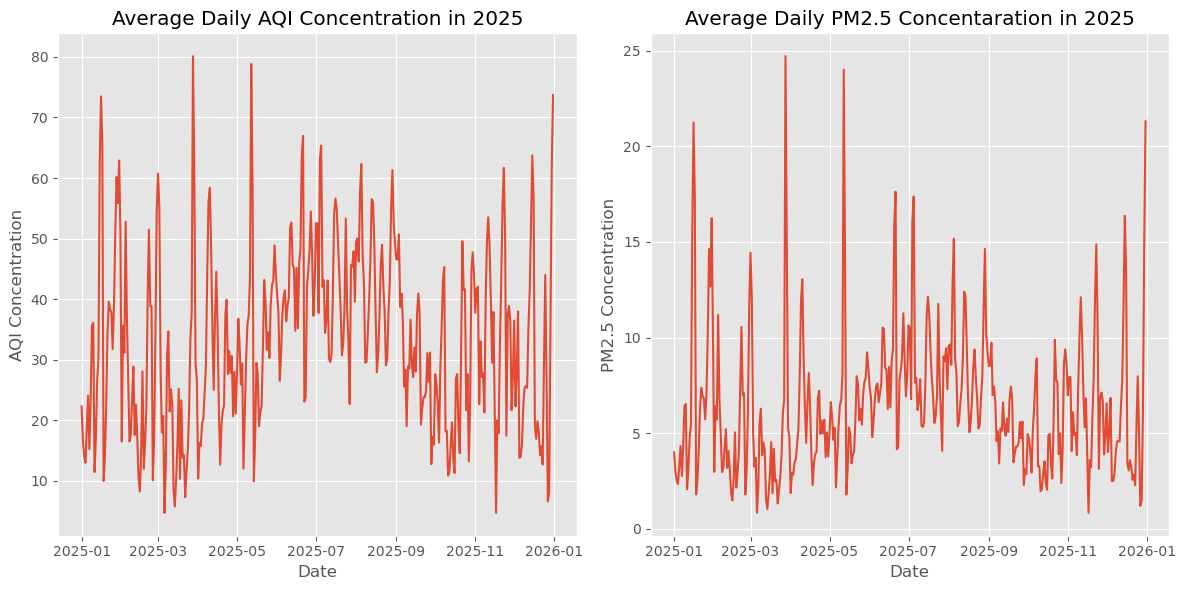

In [5]:
# your code goes here

# group the data based on the date and calcualte the avg air quality
air_by_date = SLC_air.groupby("Date").agg(
    avg_AQI = ("Daily AQI Value","mean"),
    avg_PM = ("Daily Mean PM2.5 Concentration","mean")
).reset_index()
air_by_date["Date"] = pd.to_datetime(air_by_date["Date"])
Date = air_by_date["Date"]
avg_AQI = air_by_date["avg_AQI"]
avg_PM = air_by_date["avg_PM"]


fig, axe = plt.subplots(1,2,figsize = (12,6))
axe[0].plot(Date, avg_AQI)
axe[0].set_title("Average Daily AQI Concentration in 2025")
axe[0].set_xlabel("Date")
axe[0].set_ylabel("AQI Concentration")
axe[1].plot(Date, avg_PM)
axe[1].set_title("Average Daily PM2.5 Concentaration in 2025")
axe[1].set_xlabel("Date")
axe[1].set_ylabel("PM2.5 Concentration")
plt.tight_layout()
plt.show()

In [26]:
#490352005 and 490353016

site_490352005 = SLC_air[SLC_air["Site ID"] == 490352005]
site_2005_avg = site_490352005.groupby("Date").agg(
    avg_AQI = ("Daily AQI Value","mean"),
    avg_PM = ("Daily Mean PM2.5 Concentration","mean")
).reset_index()
site_2005_avg["Date"] = pd.to_datetime(site_2005_avg["Date"])
Date_2005 = site_2005_avg["Date"]

site_2005_avg_AQI = site_2005_avg["avg_AQI"]
site_2005_avg_PM = site_2005_avg["avg_PM"]

site_490353016 = SLC_air[SLC_air["Site ID"] == 490353016]
site_3016_avg = site_490353016.groupby("Date").agg(
    avg_AQI = ("Daily AQI Value","mean"),
    avg_PM = ("Daily Mean PM2.5 Concentration","mean")
).reset_index()

site_3016_avg["Date"] = pd.to_datetime(site_3016_avg["Date"])
date_3016 = site_3016_avg["Date"]
site_3016_avg_AQI = site_3016_avg["avg_AQI"]
site_3016_avg_PM = site_3016_avg["avg_PM"]



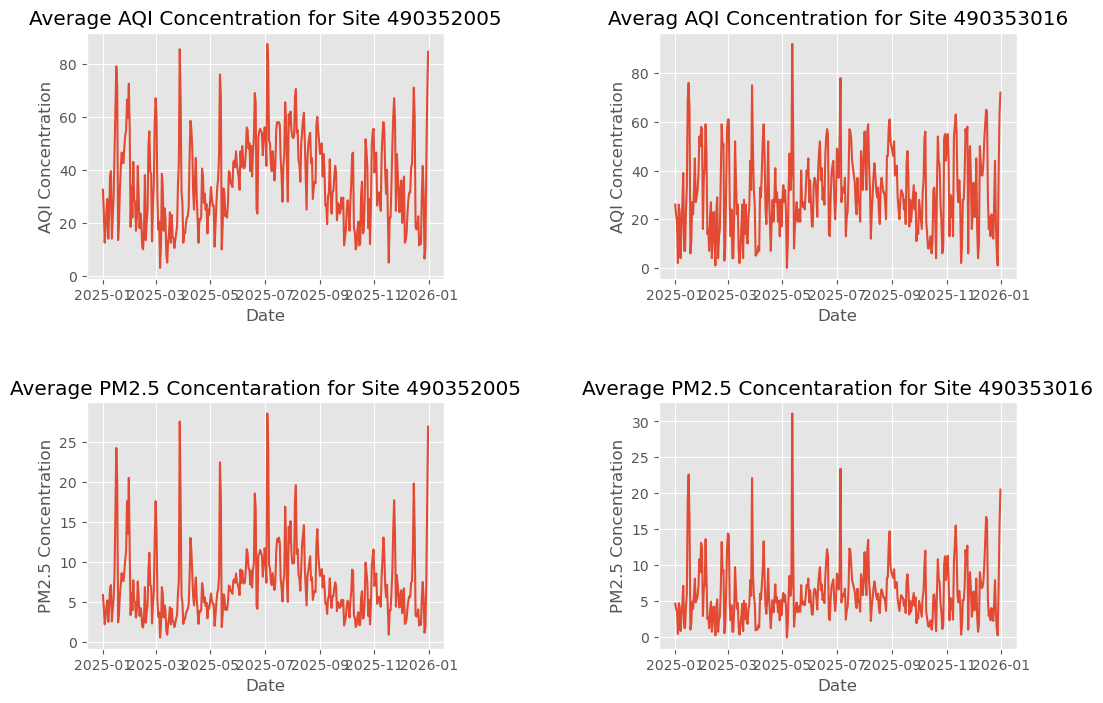

In [36]:
# plotting two sites
fig, axe = plt.subplots(2,2,figsize = (12,8))

plt.subplots_adjust(
    hspace=0.5,   # vertical space between rows
    wspace=0.6    # horizontal space between columns
)
# site 2005
axe[0,0].plot(Date_2005, site_2005_avg_AQI)
axe[0,0].set_title("Average AQI Concentration for Site 490352005")
axe[0,0].set_xlabel("Date")
axe[0,0].set_ylabel("AQI Concentration")
axe[1,0].plot(Date_2005, site_2005_avg_PM)
axe[1,0].set_title("Average PM2.5 Concentaration for Site 490352005")
axe[1,0].set_xlabel("Date")
axe[1,0].set_ylabel("PM2.5 Concentration")
#site 3016
axe[0,1].plot(date_3016, site_3016_avg_AQI)
axe[0,1].set_title("Averag AQI Concentration for Site 490353016")
axe[0,1].set_xlabel("Date")
axe[0,1].set_ylabel("AQI Concentration")
axe[1,1].plot(date_3016, site_3016_avg_PM)
axe[1,1].set_title("Average PM2.5 Concentaration for Site 490353016")
axe[1,1].set_xlabel("Date")
axe[1,1].set_ylabel("PM2.5 Concentration")
plt.show()

## Part II: A/B Testing 

First, read the [WIRED article on A/B testing](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new logo. The art department designs two options: **Logo A** and **Logo B**, shown below.![Two logos for A/B testing](https://media.wired.com/photos/5a9f3fda52430e4b5eb949ab/3:2/w_1920,c_limit/ff_abtesting_f.jpg) Your task is to determine which logo performs better.

You decide to conduct the following experiment. Using Google Ads, you purchase 6,000 advertisements. In $N_A = 3{,}000$ of the ads (randomly selected), you display Logo A, and in the remaining $N_B = 3{,}000$ ads, you display Logo B. You then record how many users click on each ad.

The results show that $n_A = 800$ viewers clicked on ads with Logo A, while $n_B = 1{,}000$ viewers clicked on ads with Logo B. Clearly, Logo B received more clicks, but is this difference *statistically significant*? Or could Logo B have performed better purely by chance?

The goal of this part is to conduct a **two-proportion z-test** to determine whether Logo B truly outperforms Logo A. The steps will be similar to those discussed in Lecture 6 for the 1954 Salk polio vaccine experiment.

### Task 2.1: Formulate the Null and Alternative Hypotheses

Let $p_A = n_A / N_A$ denote the click-through rate (proportion of clicks) for Logo A, and similarly let $p_B = n_B / N_B$ denote the click-through rate for Logo B. In terms of $p_A$ and $p_B$, clearly state the **null hypothesis** and the **alternative hypothesis**.

**Your Solution:**  

$H_0:$ the differences between PA and PB happened purely by chance, PA = PB

$H_1:$ PB is higher than PA because customers like logo B more, PB > PA

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, the test statistic—called the **two-proportion z-value**—is given by

$$Z = \frac{p_A - p_B}{\sqrt{\hat{p} \, \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}},$$

and is approximately distributed according to the standard normal distribution. Here,  

$$\hat{p} = \frac{p_A N_A+p_B N_B}{N_A + N_B}, \quad \hat{q} = 1 - \hat{p}.$$

**Task:** Compute the two-proportion z-value for the given data.

In [40]:
# your code goes here
import math as math
PA = 800/3000
PB = 1000/3000
P_hat = (PA*3000 + PB*3000) / 6000
q_hat = 1-P_hat

denominator = math.sqrt(P_hat*q_hat*(1/3000 + 1/3000))

z_value = (PA-PB)/denominator

print(z_value)

-5.6343616981901095


### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test. Do this first using the normal cdf function and then check your answer by running a two proportions z-test in python with the proportions_ztest function. 

In [44]:
# your code goes here

# p value
p_value = norm.cdf(z_value)
print(p_value)

# two proportions z-test
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(
    count=[800,1000],
    nobs=[3000,3000],
    alternative="smaller"
)

stat,pval

8.785395076012362e-09


(np.float64(-5.6343616981901095), np.float64(8.785395076012362e-09))

### Task 2.4. Interpretation

Interpret the $p$-value in this example and  state the result of the hypothesis test at the $\alpha=10\%$ and $\alpha=5\%$ significance levels. 


**Your Interpretation:** 

 


The z score and the p values calculated by me are verfied by the python function. The P value is very small almost to 0, much smaller than alpha of 0.1 or 0.05, we can reject the null hypothesis. This indicate that the z score calcualted is significant. The z score is negative prove our hypothesis that PB is greater than PA and it not due to random event. This test value provide us with strong evidence that the customers click on logo B more than logo B not based on random chance but by other factors. 